In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('refreshed.csv')

In [3]:
data.head(3)

,qr (kPa),Sh/ha,lgc/ha,bgc/ha,hgc/ha,dgc/ha,H/ha,tan_phi,del/phi_previous
0,120.0,5,1,1,1.2,1,3,0.809,0.77
1,151.8,10,1,1,1.2,1,3,0.809,0.77
2,177.0,20,1,1,1.2,1,3,0.809,0.77


In [4]:
X = data.drop(columns = ['qr (kPa)'])
X.head(3)

,Sh/ha,lgc/ha,bgc/ha,hgc/ha,dgc/ha,H/ha,tan_phi,del/phi_previous
0,5,1,1,1.2,1,3,0.809,0.77
1,10,1,1,1.2,1,3,0.809,0.77
2,20,1,1,1.2,1,3,0.809,0.77


In [5]:
y=data['qr (kPa)']
y.head(3)

0    120.0
1    151.8
2    177.0
Name: qr (kPa), dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Parameters
n_units1, n_units2, dropout_rate, n_units3, learning_rate = [1.77233170e+01, 1.52881116e+01, 0.02000000e+00, 3.96082908e+01, 1.70907903e-02]

# Define the model
model = Sequential()
model.add(Dense(units=int(n_units1), activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=int(n_units2), activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(units=int(n_units3), activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])


In [10]:
history = model.fit(X_train, y_train, batch_size=32, epochs=600, validation_split=0.2)




Epoch 1/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 192875.2656 - mse: 192875.2656 - val_loss: 261883.7031 - val_mse: 261883.7031
Epoch 2/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 185947.1562 - mse: 185947.1562 - val_loss: 244915.3438 - val_mse: 244915.3438
Epoch 3/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 205485.2812 - mse: 205485.2812 - val_loss: 200938.2500 - val_mse: 200938.2500
Epoch 4/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 162808.0312 - mse: 162808.0312 - val_loss: 123001.9375 - val_mse: 123001.9375
Epoch 5/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 75342.0625 - mse: 75342.0625 - val_loss: 44142.7812 - val_mse: 44142.7812
Epoch 6/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32285.4336 - mse: 32285.4336 - val_loss: 21306.0957 - val_mse: 21306.0957
Epoch 7/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16591.7461 - mse: 16591.7461 - val_loss: 9191.0703 - val_mse: 9191.0703
Epoch 8/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7228

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3102.8840 - mse: 3102.8840 - val_loss: 4688.7588 - val_mse: 4688.7588
Epoch 52/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2871.0593 - mse: 2871.0593 - val_loss: 4956.3535 - val_mse: 4956.3535
Epoch 53/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2637.7856 - mse: 2637.7856 - val_loss: 4898.5366 - val_mse: 4898.5366
Epoch 54/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2156.4089 - mse: 2156.4089 - val_loss: 4433.3716 - val_mse: 4433.3716
Epoch 55/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2771.5142 - mse: 2771.5142 - val_loss: 5139.2139 - val_mse: 5139.2139
Epoch 56/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2498.9438 - mse: 2498.9438 - val_loss: 3827.1697 - val_mse: 3827.1697
Epoch 57/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3390.0464 - mse: 3390.0464 - val_loss: 3253.4346 - val_mse: 3253.4346
Epoch 58/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2043.8447 - mse: 2043.8447 - val_loss: 3695.0405 - val_

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2193.7295 - mse: 2193.7295 - val_loss: 5112.9561 - val_mse: 5112.9561
Epoch 102/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2229.1077 - mse: 2229.1077 - val_loss: 2977.0024 - val_mse: 2977.0024
Epoch 103/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2759.5654 - mse: 2759.5654 - val_loss: 2982.4019 - val_mse: 2982.4019
Epoch 104/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2152.3035 - mse: 2152.3035 - val_loss: 2659.9092 - val_mse: 2659.9092
Epoch 105/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2891.3516 - mse: 2891.3516 - val_loss: 2798.6365 - val_mse: 2798.6365
Epoch 106/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2441.4314 - mse: 2441.4314 - val_loss: 2936.9185 - val_mse: 2936.9185
Epoch 107/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2583.7441 - mse: 2583.7441 - val_loss: 1839.2836 - val_mse: 1839.2836
Epoch 108/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2967.9211 - mse: 2967.9211 - val_loss: 1933.4

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 930.4251 - mse: 930.4251 - val_loss: 3021.6687 - val_mse: 3021.6687
Epoch 152/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1754.6466 - mse: 1754.6466 - val_loss: 2691.2346 - val_mse: 2691.2346
Epoch 153/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1765.9243 - mse: 1765.9243 - val_loss: 2387.0920 - val_mse: 2387.0920
Epoch 154/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1734.3877 - mse: 1734.3877 - val_loss: 3913.3184 - val_mse: 3913.3184
Epoch 155/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1857.9287 - mse: 1857.9287 - val_loss: 2510.6411 - val_mse: 2510.6411
Epoch 156/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1488.5184 - mse: 1488.5184 - val_loss: 2351.2493 - val_mse: 2351.2493
Epoch 157/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1927.2285 - mse: 1927.2285 - val_loss: 2606.5793 - val_mse: 2606.5793
Epoch 158/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1502.1089 - mse: 1502.1089 - val_loss: 2158.7471

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4234.4717 - mse: 4234.4717 - val_loss: 2147.0332 - val_mse: 2147.0332
Epoch 202/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1716.1909 - mse: 1716.1909 - val_loss: 2622.3093 - val_mse: 2622.3093
Epoch 203/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2528.7700 - mse: 2528.7700 - val_loss: 2635.7192 - val_mse: 2635.7192
Epoch 204/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1305.4747 - mse: 1305.4747 - val_loss: 2576.6138 - val_mse: 2576.6138
Epoch 205/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 961.2750 - mse: 961.2750 - val_loss: 1668.4182 - val_mse: 1668.4182
Epoch 206/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1838.2834 - mse: 1838.2834 - val_loss: 1562.2161 - val_mse: 1562.2161
Epoch 207/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1420.0721 - mse: 1420.0721 - val_loss: 1820.9850 - val_mse: 1820.9850
Epoch 208/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 914.9071 - mse: 914.9071 - val_loss: 1776.3105 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2474.8137 - mse: 2474.8137 - val_loss: 2428.6272 - val_mse: 2428.6272
Epoch 252/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1404.9376 - mse: 1404.9376 - val_loss: 2001.5687 - val_mse: 2001.5687
Epoch 253/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1329.7499 - mse: 1329.7499 - val_loss: 3431.2427 - val_mse: 3431.2427
Epoch 254/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2076.3577 - mse: 2076.3577 - val_loss: 1201.8970 - val_mse: 1201.8970
Epoch 255/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1350.5920 - mse: 1350.5920 - val_loss: 1275.3594 - val_mse: 1275.3594
Epoch 256/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1252.1301 - mse: 1252.1301 - val_loss: 2014.5085 - val_mse: 2014.5085
Epoch 257/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2405.5085 - mse: 2405.5085 - val_loss: 1495.7744 - val_mse: 1495.7744
Epoch 258/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2168.5149 - mse: 2168.5149 - val_loss: 2165.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1827.1610 - mse: 1827.1610 - val_loss: 1229.5872 - val_mse: 1229.5872
Epoch 302/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1484.7336 - mse: 1484.7336 - val_loss: 2440.8801 - val_mse: 2440.8801
Epoch 303/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1529.2202 - mse: 1529.2202 - val_loss: 1542.6647 - val_mse: 1542.6647
Epoch 304/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1227.8904 - mse: 1227.8904 - val_loss: 2377.4727 - val_mse: 2377.4727
Epoch 305/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1650.6294 - mse: 1650.6294 - val_loss: 2088.6748 - val_mse: 2088.6748
Epoch 306/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1106.1478 - mse: 1106.1478 - val_loss: 1843.7739 - val_mse: 1843.7739
Epoch 307/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1299.0990 - mse: 1299.0990 - val_loss: 2002.2266 - val_mse: 2002.2266
Epoch 308/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 886.9992 - mse: 886.9992 - val_loss: 1364.41

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 917.6918 - mse: 917.6918 - val_loss: 1377.9873 - val_mse: 1377.9873
Epoch 352/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1084.1448 - mse: 1084.1448 - val_loss: 1084.3632 - val_mse: 1084.3632
Epoch 353/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 854.6161 - mse: 854.6161 - val_loss: 1443.8223 - val_mse: 1443.8223
Epoch 354/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1276.1866 - mse: 1276.1866 - val_loss: 1066.1353 - val_mse: 1066.1353
Epoch 355/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1015.3257 - mse: 1015.3257 - val_loss: 1596.6757 - val_mse: 1596.6757
Epoch 356/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 634.2571 - mse: 634.2571 - val_loss: 1362.9338 - val_mse: 1362.9338
Epoch 357/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1852.6360 - mse: 1852.6360 - val_loss: 1086.3236 - val_mse: 1086.3236
Epoch 358/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 979.7960 - mse: 979.7960 - val_loss: 1304.5680 - val_ms

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2658.5068 - mse: 2658.5068 - val_loss: 1890.8539 - val_mse: 1890.8539
Epoch 402/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1569.6709 - mse: 1569.6709 - val_loss: 2159.3896 - val_mse: 2159.3896
Epoch 403/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1876.4978 - mse: 1876.4978 - val_loss: 1172.7979 - val_mse: 1172.7979
Epoch 404/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1048.7626 - mse: 1048.7626 - val_loss: 1396.6887 - val_mse: 1396.6887
Epoch 405/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1266.6819 - mse: 1266.6819 - val_loss: 1142.7979 - val_mse: 1142.7979
Epoch 406/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 792.7971 - mse: 792.7971 - val_loss: 1510.1357 - val_mse: 1510.1357
Epoch 407/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1051.4308 - mse: 1051.4308 - val_loss: 1281.2069 - val_mse: 1281.2069
Epoch 408/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1530.7068 - mse: 1530.7068 - val_loss: 2744.61

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 968.5413 - mse: 968.5413 - val_loss: 1156.3076 - val_mse: 1156.3076
Epoch 452/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 888.7422 - mse: 888.7422 - val_loss: 1190.6495 - val_mse: 1190.6495
Epoch 453/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 847.5242 - mse: 847.5242 - val_loss: 1199.9993 - val_mse: 1199.9993
Epoch 454/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 689.6432 - mse: 689.6432 - val_loss: 1039.8750 - val_mse: 1039.8750
Epoch 455/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 836.8622 - mse: 836.8622 - val_loss: 908.8826 - val_mse: 908.8826
Epoch 456/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 811.9843 - mse: 811.9843 - val_loss: 1619.7789 - val_mse: 1619.7789
Epoch 457/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1323.1678 - mse: 1323.1678 - val_loss: 991.4355 - val_mse: 991.4355
Epoch 458/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 823.4628 - mse: 823.4628 - val_loss: 1183.2520 - val_mse: 1183.

Epoch 502/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 534.0206 - mse: 534.0206 - val_loss: 961.3605 - val_mse: 961.3605
Epoch 503/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 848.8033 - mse: 848.8033 - val_loss: 1310.4401 - val_mse: 1310.4401
Epoch 504/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 643.7604 - mse: 643.7604 - val_loss: 1199.6310 - val_mse: 1199.6310
Epoch 505/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 721.0193 - mse: 721.0193 - val_loss: 1259.2314 - val_mse: 1259.2314
Epoch 506/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 735.4617 - mse: 735.4617 - val_loss: 1023.9896 - val_mse: 1023.9896
Epoch 507/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 714.9969 - mse: 714.9969 - val_loss: 845.1592 - val_mse: 845.1592
Epoch 508/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 592.2507 - mse: 592.2507 - val_loss: 749.5746 - val_mse: 749.5746
Epoch 509/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 525.7655 - mse: 525.7655 - val_loss: 951.8040 - val_mse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3085.4690 - mse: 3085.4690 - val_loss: 3374.1582 - val_mse: 3374.1582
Epoch 553/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2289.7627 - mse: 2289.7627 - val_loss: 3143.9417 - val_mse: 3143.9417
Epoch 554/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3112.3286 - mse: 3112.3286 - val_loss: 3320.7051 - val_mse: 3320.7051
Epoch 555/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3014.7200 - mse: 3014.7200 - val_loss: 3452.9353 - val_mse: 3452.9353
Epoch 556/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2948.9380 - mse: 2948.9380 - val_loss: 3094.6951 - val_mse: 3094.6951
Epoch 557/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2304.0139 - mse: 2304.0139 - val_loss: 1549.5349 - val_mse: 1549.5349
Epoch 558/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1439.7871 - mse: 1439.7871 - val_loss: 1007.4361 - val_mse: 1007.4361
Epoch 559/600
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 809.3920 - mse: 809.3920 - val_loss: 971.618

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example function to calculate MAAPE
def mean_absolute_percentage_error(y_true, y_pred):
    # Ensure no division by zero
    y_true = np.where(y_true == 0, np.nan, y_true)
    return np.nanmean(np.abs((y_true - y_pred) / y_true)) * 100

# Example function to calculate RWI
def relative_weighted_index(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)) / np.mean(np.abs(y_true))

# Example function to calculate RPD
def ratio_of_performance_to_deviation(y_true, y_pred):
    return np.std(y_true) / np.std(y_pred)

# Flatten predictions and true values if they are not 1D
def flatten_if_needed(arr):
    return arr.flatten() if arr.ndim > 1 else arr

# Predict using the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Flatten predictions and targets
y_train = flatten_if_needed(y_train)
y_test = flatten_if_needed(y_test)
y_train_pred = flatten_if_needed(y_train_pred)
y_test_pred = flatten_if_needed(y_test_pred)

# Compute metrics for the model
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
maape_train = mean_absolute_percentage_error(y_train, y_train_pred)
maape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rwi_train = relative_weighted_index(y_train, y_train_pred)
rwi_test = relative_weighted_index(y_test, y_test_pred)
rpd_train = ratio_of_performance_to_deviation(y_train, y_train_pred)
rpd_test = ratio_of_performance_to_deviation(y_test, y_test_pred)

# Create DataFrame
data = {
    'Statistical indices': ['RMSE', 'MAE', 'MAAPE (%)', 'R2', 'RWI', 'RPD'],
    'Model Training data': [rmse_train, mae_train, maape_train, r2_train, rwi_train, rpd_train],
    'Model Testing data': [rmse_test, mae_test, maape_test, r2_test, rwi_test, rpd_test]
}

df = pd.DataFrame(data)

df


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Statistical indices,Model Training data,Model Testing data
0,RMSE,20.522356,22.243243
1,MAE,14.009905,17.516288
2,MAAPE (%),4.228100,6.415598
3,R2,0.994318,0.994225
4,RWI,0.036916,0.042294
5,RPD,0.991107,1.005831


In [12]:
import pandas as pd
from sklearn.inspection import permutation_importance

feature_names = ['Sh/ha', 'lgc/ha', 'bgc/ha', 'hgc/ha', 'dgc/ha', 'H/ha', 'tan_phi', 'del/phi_previous']

def calculate_permutation_importance(model, X, y):
    results = permutation_importance(model, X, y, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)

    # Calculate importance percentages
    importances = results.importances_mean
    total_importance = importances.sum()
    importance_percentages = (importances / total_importance) * 100

    # Create a DataFrame for feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance (%)': importance_percentages
    })
    
    return importance_df.sort_values(by='Importance (%)', ascending=False)

# Calculate feature importances
feature_importance = calculate_permutation_importance(model, X_test, y_test)

# Store feature names and importances
features = feature_importance['Feature'].tolist()
importances = feature_importance['Importance (%)'].tolist()

print("Features:", features)
print("Importances (%):", importances)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━

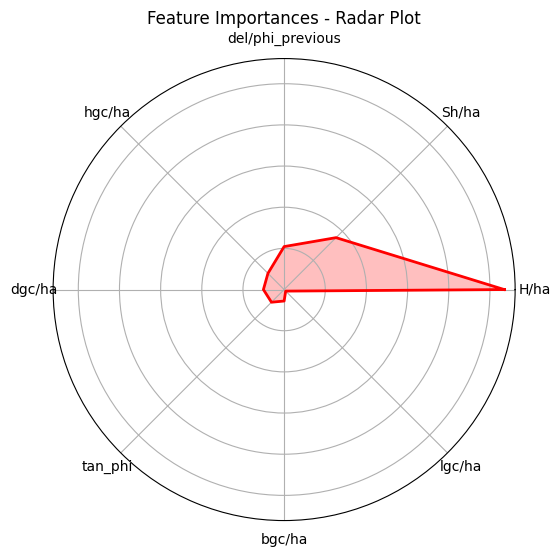

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# Number of variables
num_vars = len(features)

# Compute angle for each feature
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
importances = np.concatenate((importances, [importances[0]]))
angles += angles[:1]

# Plotting
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(angles, importances, color='red', alpha=0.25)
ax.plot(angles, importances, color='red', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)

plt.title('Feature Importances - Radar Plot')
plt.show()


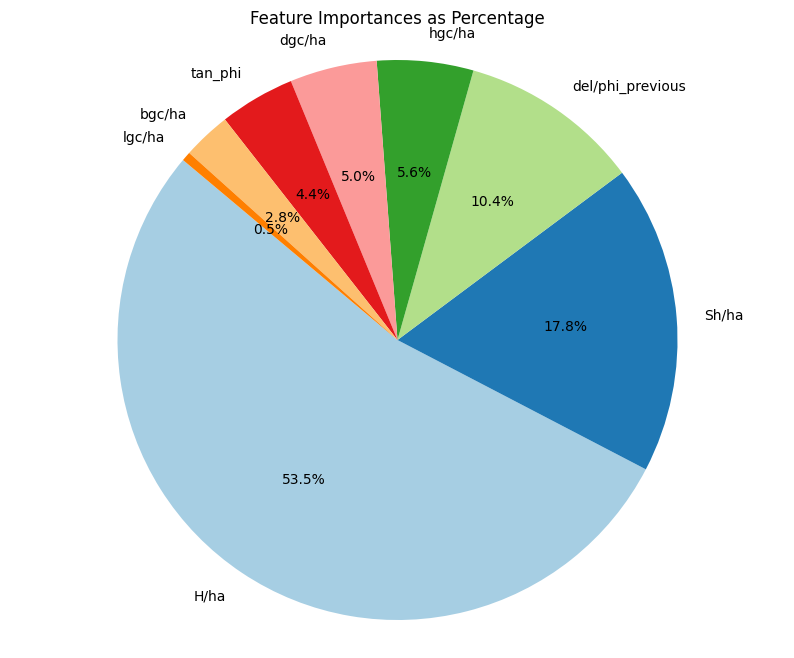

In [14]:
import matplotlib.pyplot as plt

features = feature_importance['Feature'].tolist()
importances = feature_importance['Importance (%)'].tolist()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(importances, labels=features, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(features))))
plt.title('Feature Importances as Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


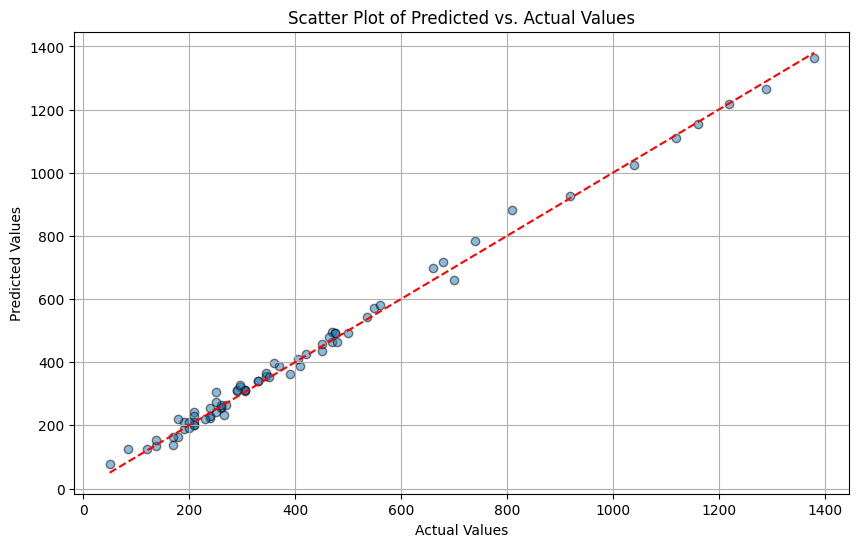

In [15]:
import numpy as np
import matplotlib.pyplot as plt

y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.grid(True)
plt.show()


In [16]:
model.save('model.h5')


# Equation

## Using linear Regression

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


features = ['Sh/ha', 'lgc/ha', 'bgc/ha', 'hgc/ha', 'dgc/ha', 'H/ha', 'tan_phi', 'del/phi_previous']
target = 'qr (kPa)'

# Sample data
data = pd.read_csv('refreshed.csv')

# Extract features and target
X = data[features]
y = data[target]

# Create polynomial features
poly = PolynomialFeatures(degree=1)  # Change degree for higher-order polynomials
X_poly = poly.fit_transform(X)

# Fit the model
model2 = LinearRegression()
model2.fit(X_poly, y)

# Get the coefficients and intercept
coefficients = model2.coef_
intercept = model2.intercept_

# Create the polynomial equation
def create_polynomial_equation(coefficients, intercept, feature_names, degree):
    terms = []
    n_features = len(feature_names)
    feature_names_poly = poly.get_feature_names_out(input_features=feature_names)
    
    for i, coef in enumerate(coefficients):
        if coef != 0:
            terms.append(f"{coef:.4f} * {feature_names_poly[i]}")
    
    equation = " + ".join(terms)
    return f"{intercept:.4f} + {equation}"

# Generate and print the equation
polynomial_equation = create_polynomial_equation(coefficients, intercept, features, degree=1)
print("Polynomial Equation:")
print(polynomial_equation)


Polynomial Equation:
-1296.1637 + 3.9387 * Sh/ha + 9.8169 * lgc/ha + 28.8046 * bgc/ha + 83.7613 * hgc/ha + -79.1573 * dgc/ha + 126.1540 * H/ha + 715.6460 * tan_phi + 402.7726 * del/phi_previous


In [18]:
def calculate_target(Sh_ha, lgc_ha, bgc_ha, hgc_ha, dgc_ha, H_ha, tan_phi, del_phi_previous):
    # Coefficients from the polynomial equation
    coefficients = {
        'intercept': -1296.1637,
        'Sh/ha': 3.9387,
        'lgc/ha': 9.8169,
        'bgc/ha': 28.8046,
        'hgc/ha': 83.7613,
        'dgc/ha': -79.1573,
        'H/ha': 126.1540,
        'tan_phi': 715.6460,
        'del/phi_previous': 402.7726
    }
    
    # Calculate the target value based on the polynomial equation
    target = (coefficients['intercept'] +
              coefficients['Sh/ha'] * Sh_ha +
              coefficients['lgc/ha'] * lgc_ha +
              coefficients['bgc/ha'] * bgc_ha +
              coefficients['hgc/ha'] * hgc_ha +
              coefficients['dgc/ha'] * dgc_ha +
              coefficients['H/ha'] * H_ha +
              coefficients['tan_phi'] * tan_phi +
              coefficients['del/phi_previous'] * del_phi_previous)
    
    return target

def main():
    print("Enter the values for the features:")

    # Prompt the user for inputs
    Sh_ha = float(input("Sh/ha: "))
    lgc_ha = float(input("lgc/ha: "))
    bgc_ha = float(input("bgc/ha: "))
    hgc_ha = float(input("hgc/ha: "))
    dgc_ha = float(input("dgc/ha: "))
    H_ha = float(input("H/ha: "))
    tan_phi = float(input("tan_phi: "))
    del_phi_previous = float(input("del/phi_previous: "))

    # Calculate the target
    target = calculate_target(Sh_ha, lgc_ha, bgc_ha, hgc_ha, dgc_ha, H_ha, tan_phi, del_phi_previous)

    print(f"\nCalculated Target Value: {target:.4f}")

if __name__ == "__main__":
    main()


Enter the values for the features:
Sh/ha: 30
lgc/ha: 7
bgc/ha: 3
hgc/ha: 2
dgc/ha: 1
H/ha: 9
tan_phi: 0.809
del/phi_previous: 0.77

Calculated Target Value: 1089.9732


## Using ANN-Model

In [19]:
from tensorflow.keras.models import load_model

# Path to the saved model
model_path = 'model.h5'

# Load the model
model = load_model(model_path)

# Print the model summary to verify it was loaded correctly
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 17)                  │             153 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 39)                  │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              40 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.26 KB)

 Trainable params: 1,087 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [20]:
# Extract weights and biases
weights = model.get_weights()
input_layer_weights = weights[0]  # Shape: (number of input features, number of units in the first layer)
input_layer_biases = weights[1]   # Shape: (number of units in the first layer,)

# Create polynomial-like equation based on weights
def create_nn_equation(weights, biases, feature_names):
    terms = []
    n_features = len(feature_names)
    
    # For simplicity, consider only the first hidden layer's weights and biases
    for i in range(weights.shape[1]):
        term = f"({biases[i]:.4f})"
        for j in range(n_features):
            term += f" + ({weights[j, i]:.4f}) * {feature_names[j]}"
        terms.append(term)
    
    # Aggregate terms into a polynomial-like format
    equation = " + ".join(terms)
    return equation

# Generate and print the equation
nn_equation = create_nn_equation(input_layer_weights, input_layer_biases, features)
print("Neural Network-Based Equation:")
print(nn_equation)


Neural Network-Based Equation:
(-1.1392) + (-0.7583) * Sh/ha + (0.0151) * lgc/ha + (-0.4221) * bgc/ha + (-0.5016) * hgc/ha + (0.8715) * dgc/ha + (1.2779) * H/ha + (-0.5178) * tan_phi + (-0.0062) * del/phi_previous + (-0.0239) + (1.0409) * Sh/ha + (-0.4259) * lgc/ha + (-1.2384) * bgc/ha + (1.2447) * hgc/ha + (0.4413) * dgc/ha + (-1.1787) * H/ha + (-0.0105) * tan_phi + (-0.0724) * del/phi_previous + (0.4942) + (0.4312) * Sh/ha + (0.0088) * lgc/ha + (0.1488) * bgc/ha + (0.3798) * hgc/ha + (0.4093) * dgc/ha + (0.0958) * H/ha + (0.7615) * tan_phi + (0.9831) * del/phi_previous + (0.4874) + (0.4554) * Sh/ha + (-0.1520) * lgc/ha + (-0.2052) * bgc/ha + (-0.0631) * hgc/ha + (-0.6331) * dgc/ha + (0.1842) * H/ha + (0.4450) * tan_phi + (0.7433) * del/phi_previous + (1.3054) + (1.2578) * Sh/ha + (0.1055) * lgc/ha + (0.4397) * bgc/ha + (0.5769) * hgc/ha + (-1.3278) * dgc/ha + (-0.1748) * H/ha + (-0.1773) * tan_phi + (0.2667) * del/phi_previous + (0.6730) + (1.0851) * Sh/ha + (0.1666) * lgc/ha + (0.82

In [21]:
from collections import defaultdict

# Original terms from the neural network model output
terms = [
    (-2.6649, 1),
    (0.0635, 'Sh/ha'),
    (-0.1287, 'lgc/ha'),
    (0.1362, 'bgc/ha'),
    (1.0689, 'hgc/ha'),
    (-2.6550, 'dgc/ha'),
    (0.8419, 'H/ha'),
    (-1.2779, 'tan_phi'),
    (-1.8597, 'del/phi_previous'),
    (-1.7468, 1),
    (0.1284, 'Sh/ha'),
    (0.0635, 'lgc/ha'),
    (0.5164, 'bgc/ha'),
    (0.9221, 'hgc/ha'),
    (-1.3904, 'dgc/ha'),
    (1.1236, 'H/ha'),
    (1.0852, 'tan_phi'),
    (-0.4096, 'del/phi_previous'),
    (-2.2594, 1),
    (0.1390, 'Sh/ha'),
    (-0.1750, 'lgc/ha'),
    (0.0231, 'bgc/ha'),
    (1.3484, 'hgc/ha'),
    (-4.4991, 'dgc/ha'),
    (1.1544, 'H/ha'),
    (1.2582, 'tan_phi'),
    (-0.5525, 'del/phi_previous'),
    (-2.5348, 1),
    (0.0559, 'Sh/ha'),
    (-0.3069, 'lgc/ha'),
    (0.1064, 'bgc/ha'),
    (-0.7094, 'hgc/ha'),
    (-2.6811, 'dgc/ha'),
    (0.5619, 'H/ha'),
    (-1.8590, 'tan_phi'),
    (-1.9837, 'del/phi_previous'),
    (0.3229, 1),
    (0.8302, 'Sh/ha'),
    (-0.6931, 'lgc/ha'),
    (-1.2116, 'bgc/ha'),
    (-1.3013, 'hgc/ha'),
    (-0.3603, 'dgc/ha'),
    (-2.1859, 'H/ha'),
    (-3.1240, 'tan_phi'),
    (-0.9387, 'del/phi_previous'),
    (-1.6041, 1),
    (0.2482, 'Sh/ha'),
    (-0.1647, 'lgc/ha'),
    (0.0135, 'bgc/ha'),
    (-0.1387, 'hgc/ha'),
    (-1.6165, 'dgc/ha'),
    (0.9115, 'H/ha'),
    (1.5896, 'tan_phi'),
    (-0.7877, 'del/phi_previous'),
    (0.0000, 1),
    (-0.1610, 'Sh/ha'),
    (0.0665, 'lgc/ha'),
    (-0.0835, 'bgc/ha'),
    (0.3103, 'hgc/ha'),
    (0.2843, 'dgc/ha'),
    (-0.4272, 'H/ha'),
    (-0.4538, 'tan_phi'),
    (0.4702, 'del/phi_previous'),
    (-1.6470, 1),
    (0.0209, 'Sh/ha'),
    (0.1883, 'lgc/ha'),
    (0.7819, 'bgc/ha'),
    (0.2815, 'hgc/ha'),
    (-3.4996, 'dgc/ha'),
    (0.2969, 'H/ha'),
    (3.0516, 'tan_phi'),
    (-0.4846, 'del/phi_previous'),
    (-1.6767, 1),
    (0.2022, 'Sh/ha'),
    (-0.5486, 'lgc/ha'),
    (-0.5121, 'bgc/ha'),
    (0.2818, 'hgc/ha'),
    (-2.3621, 'dgc/ha'),
    (0.7719, 'H/ha'),
    (0.9501, 'tan_phi'),
    (-0.2548, 'del/phi_previous'),
    (-0.3274, 1),
    (0.0413, 'Sh/ha'),
    (-0.4438, 'lgc/ha'),
    (-0.3587, 'bgc/ha'),
    (-0.7034, 'hgc/ha'),
    (-0.0940, 'dgc/ha'),
    (-0.1892, 'H/ha'),
    (-0.6468, 'tan_phi'),
    (-0.7252, 'del/phi_previous'),
    (-1.1938, 1),
    (0.4963, 'Sh/ha'),
    (0.4681, 'lgc/ha'),
    (-0.1736, 'bgc/ha'),
    (0.5132, 'hgc/ha'),
    (-0.0467, 'dgc/ha'),
    (0.6838, 'H/ha'),
    (2.6629, 'tan_phi'),
    (0.2906, 'del/phi_previous'),
    (-1.7662, 1),
    (0.1334, 'Sh/ha'),
    (0.1209, 'lgc/ha'),
    (0.4553, 'bgc/ha'),
    (1.1627, 'hgc/ha'),
    (-1.6929, 'dgc/ha'),
    (1.2325, 'H/ha'),
    (1.4207, 'tan_phi'),
    (-0.5488, 'del/phi_previous'),
    (-3.2548, 1),
    (0.0929, 'Sh/ha'),
    (-0.2568, 'lgc/ha'),
    (0.8114, 'bgc/ha'),
    (1.2991, 'hgc/ha'),
    (-3.8098, 'dgc/ha'),
    (0.8952, 'H/ha'),
    (-1.1674, 'tan_phi'),
    (-2.4497, 'del/phi_previous'),
    (-2.4864, 1),
    (0.0515, 'Sh/ha'),
    (-0.0893, 'lgc/ha'),
    (0.1366, 'bgc/ha'),
    (1.0650, 'hgc/ha'),
    (-2.2556, 'dgc/ha'),
    (0.7376, 'H/ha'),
    (-1.0148, 'tan_phi'),
    (-2.0119, 'del/phi_previous'),
    (-0.0960, 1),
    (-0.3269, 'Sh/ha'),
    (0.3692, 'lgc/ha'),
    (-0.4538, 'bgc/ha'),
    (0.0911, 'hgc/ha'),
    (-0.3423, 'dgc/ha'),
    (-0.5108, 'H/ha'),
    (0.3661, 'tan_phi'),
    (-0.0705, 'del/phi_previous'),
    (-3.8985, 1),
    (0.2085, 'Sh/ha'),
    (-0.4712, 'lgc/ha'),
    (0.0936, 'bgc/ha'),
    (-0.9100, 'hgc/ha'),
    (-3.8078, 'dgc/ha'),
    (0.6678, 'H/ha'),
    (-3.2875, 'tan_phi'),
    (-3.8062, 'del/phi_previous'),
    (-3.2972, 1),
    (0.4137, 'Sh/ha'),
    (-0.4416, 'lgc/ha'),
    (-0.0776, 'bgc/ha'),
    (0.3277, 'hgc/ha'),
    (-4.1961, 'dgc/ha'),
    (0.9757, 'H/ha'),
    (-0.2955, 'tan_phi'),
    (-1.8506, 'del/phi_previous')
]

# Combine like terms
term_dict = defaultdict(float)
for coef, feature in terms:
    term_dict[feature] += coef

# Generate the simplified polynomial equation
def generate_simplified_equation(term_dict):
    equation_terms = []
    for feature, coef in term_dict.items():
        if coef != 0:
            equation_terms.append(f"{coef:.4f} * {feature}")
    return " + ".join(equation_terms)

# Generate and print
simplified_equation = generate_simplified_equation(term_dict)
print("Simplified Neural Network-Based Equation:")
print(simplified_equation)

Simplified Neural Network-Based Equation:
-30.1311 * 1 + 2.6380 * Sh/ha + -2.4432 * lgc/ha + 0.2035 * bgc/ha + 4.9090 * hgc/ha + -35.0250 * dgc/ha + 7.5416 * H/ha + -0.7423 * tan_phi + -17.9734 * del/phi_previous


In [22]:
def calculate_target(Sh_ha, lgc_ha, bgc_ha, hgc_ha, dgc_ha, H_ha, tan_phi, del_phi_previous):
    # Coefficients for the equation
    coefficient_Sh_ha = 2.6380
    coefficient_lgc_ha = -2.4432
    coefficient_bgc_ha = 0.2035
    coefficient_hgc_ha = 4.9090
    coefficient_dgc_ha = -35.0250
    coefficient_H_ha = 7.5416
    coefficient_tan_phi = -0.7423
    coefficient_del_phi_previous = -17.9734
    constant = -30.1311

    # Calculate the target value
    target = (
        constant +
        coefficient_Sh_ha * Sh_ha +
        coefficient_lgc_ha * lgc_ha +
        coefficient_bgc_ha * bgc_ha +
        coefficient_hgc_ha * hgc_ha +
        coefficient_dgc_ha * dgc_ha +
        coefficient_H_ha * H_ha +
        coefficient_tan_phi * tan_phi +
        coefficient_del_phi_previous * del_phi_previous
    )
    
    return target

def main():
    print("Please enter the following feature values:")

    # Prompt user for feature values
    try:
        Sh_ha = float(input("Enter value for Sh/ha: "))
        lgc_ha = float(input("Enter value for lgc/ha: "))
        bgc_ha = float(input("Enter value for bgc/ha: "))
        hgc_ha = float(input("Enter value for hgc/ha: "))
        dgc_ha = float(input("Enter value for dgc/ha: "))
        H_ha = float(input("Enter value for H/ha: "))
        tan_phi = float(input("Enter value for tan_phi: "))
        del_phi_previous = float(input("Enter value for del/phi_previous: "))

        # Calculate the target
        target = calculate_target(Sh_ha, lgc_ha, bgc_ha, hgc_ha, dgc_ha, H_ha, tan_phi, del_phi_previous)
        
        # Print the result
        print(f"\nCalculated target value: {target:.4f}")

    except ValueError:
        print("Invalid input. Please enter numeric values.")

if __name__ == "__main__":
    main()


Please enter the following feature values:
Enter value for Sh/ha: 30
Enter value for lgc/ha: 7
Enter value for bgc/ha: 3
Enter value for hgc/ha: 2
Enter value for dgc/ha: 1
Enter value for H/ha: 9
Enter value for tan_phi: 0.809
Enter value for del/phi_previous: 0.77

Calculated target value: 60.7444
